# EDA and Feature Enginnering

In [1]:
# import basic required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import math

In [2]:
df = pd.read_csv('../data/Calorie_expenditure.csv')
df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [3]:
print(f"Dataframe shape: {df.shape}")
print(f"Count of null values in each column:\n{df.isnull().sum()}")

Dataframe shape: (750000, 9)
Count of null values in each column:
id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [5]:
df.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [6]:
# remove unncessary columns
df.drop('id', axis=1, inplace=True)

In [7]:
# Separating numeric,categorical features and target features
numeric_features = df.select_dtypes(exclude = object).columns
categorical_features = df.select_dtypes(include = object).columns

#### Histogram + KDE of numeric columns

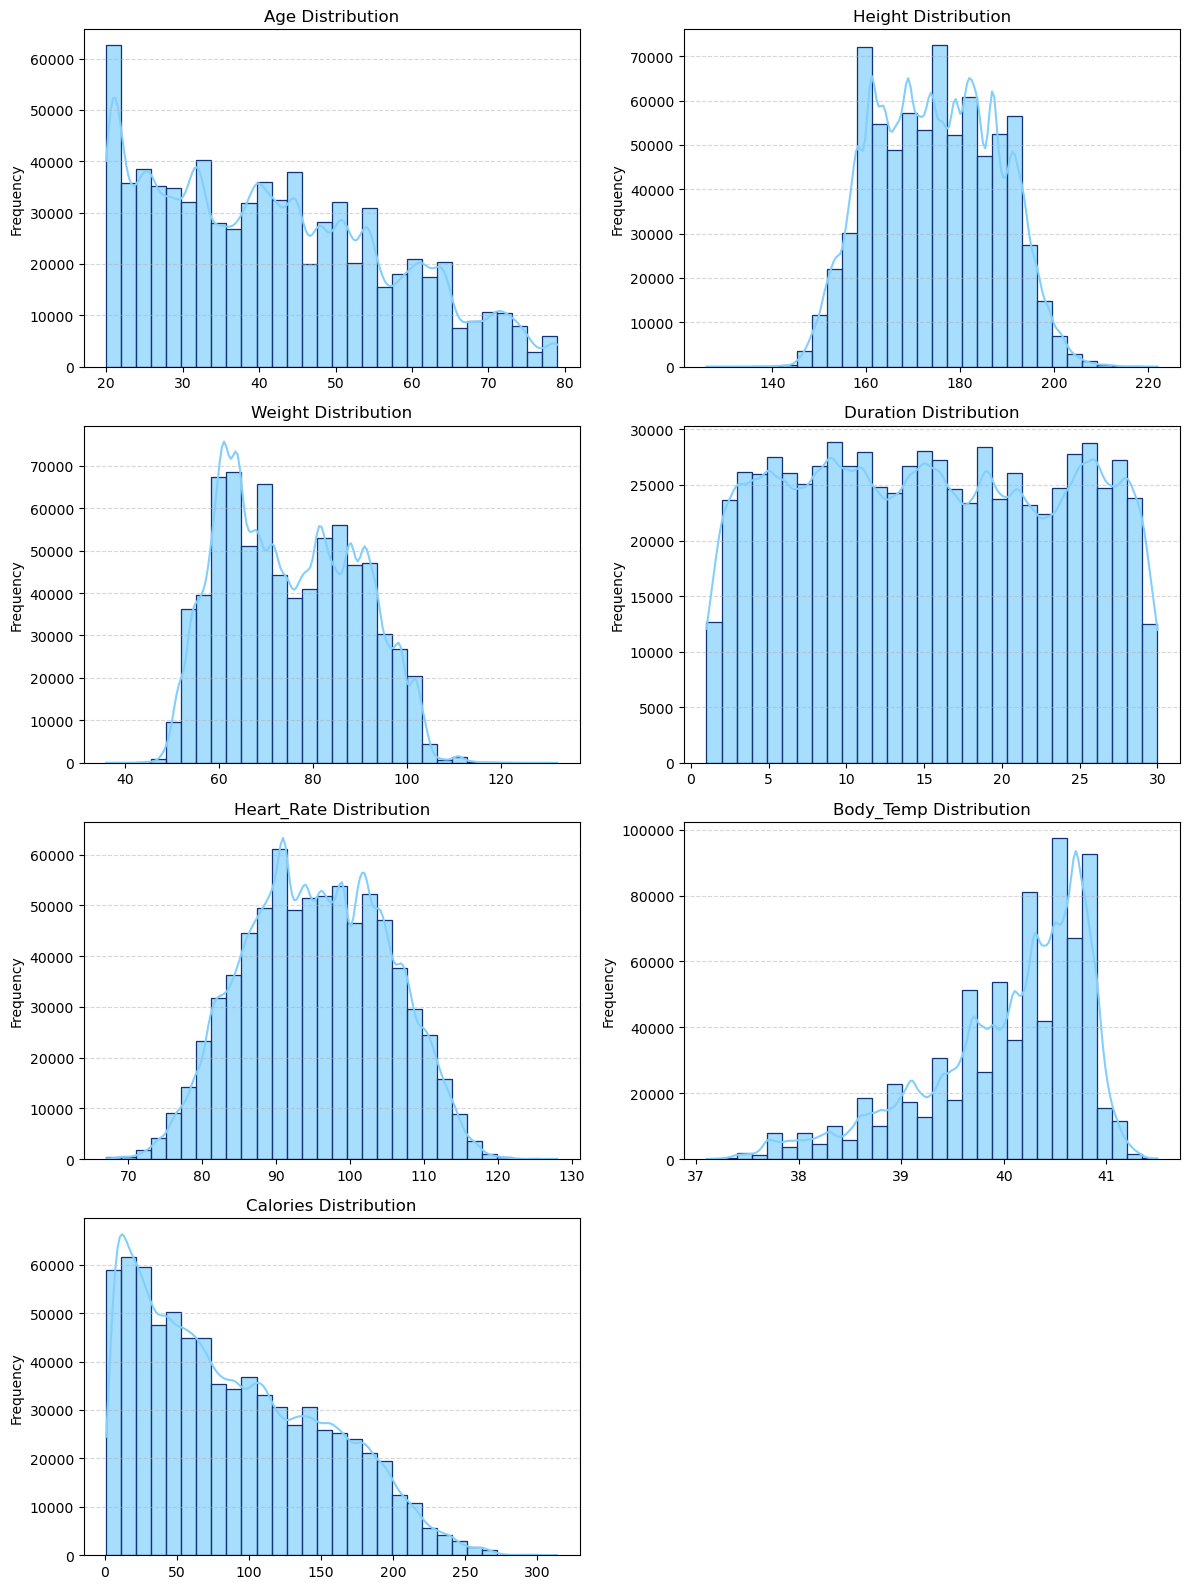

In [8]:
# Columns to plot
cols = len(numeric_features)

# Automatic grid layout
cols_per_row = 2  # Adjust as needed
rows = math.ceil(cols / cols_per_row)

plt.figure(figsize=(cols_per_row * 6, rows * 4))  # Dynamic figure size

# Loop through columns
for i, col in enumerate(numeric_features, 1):
    plt.subplot(rows, cols_per_row, i)
    
    # Histogram + KDE
    sns.histplot(
        data=df, 
        x=col, 
        kde=True, 
        bins=30, 
        color="#82CFFD",  # softer color
        edgecolor="#137", 
        alpha=0.7
    )
    
    plt.title(f'{col} Distribution', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.5)  # subtle gridlines

plt.tight_layout()
plt.show()

#### Boxplot for numeric columns

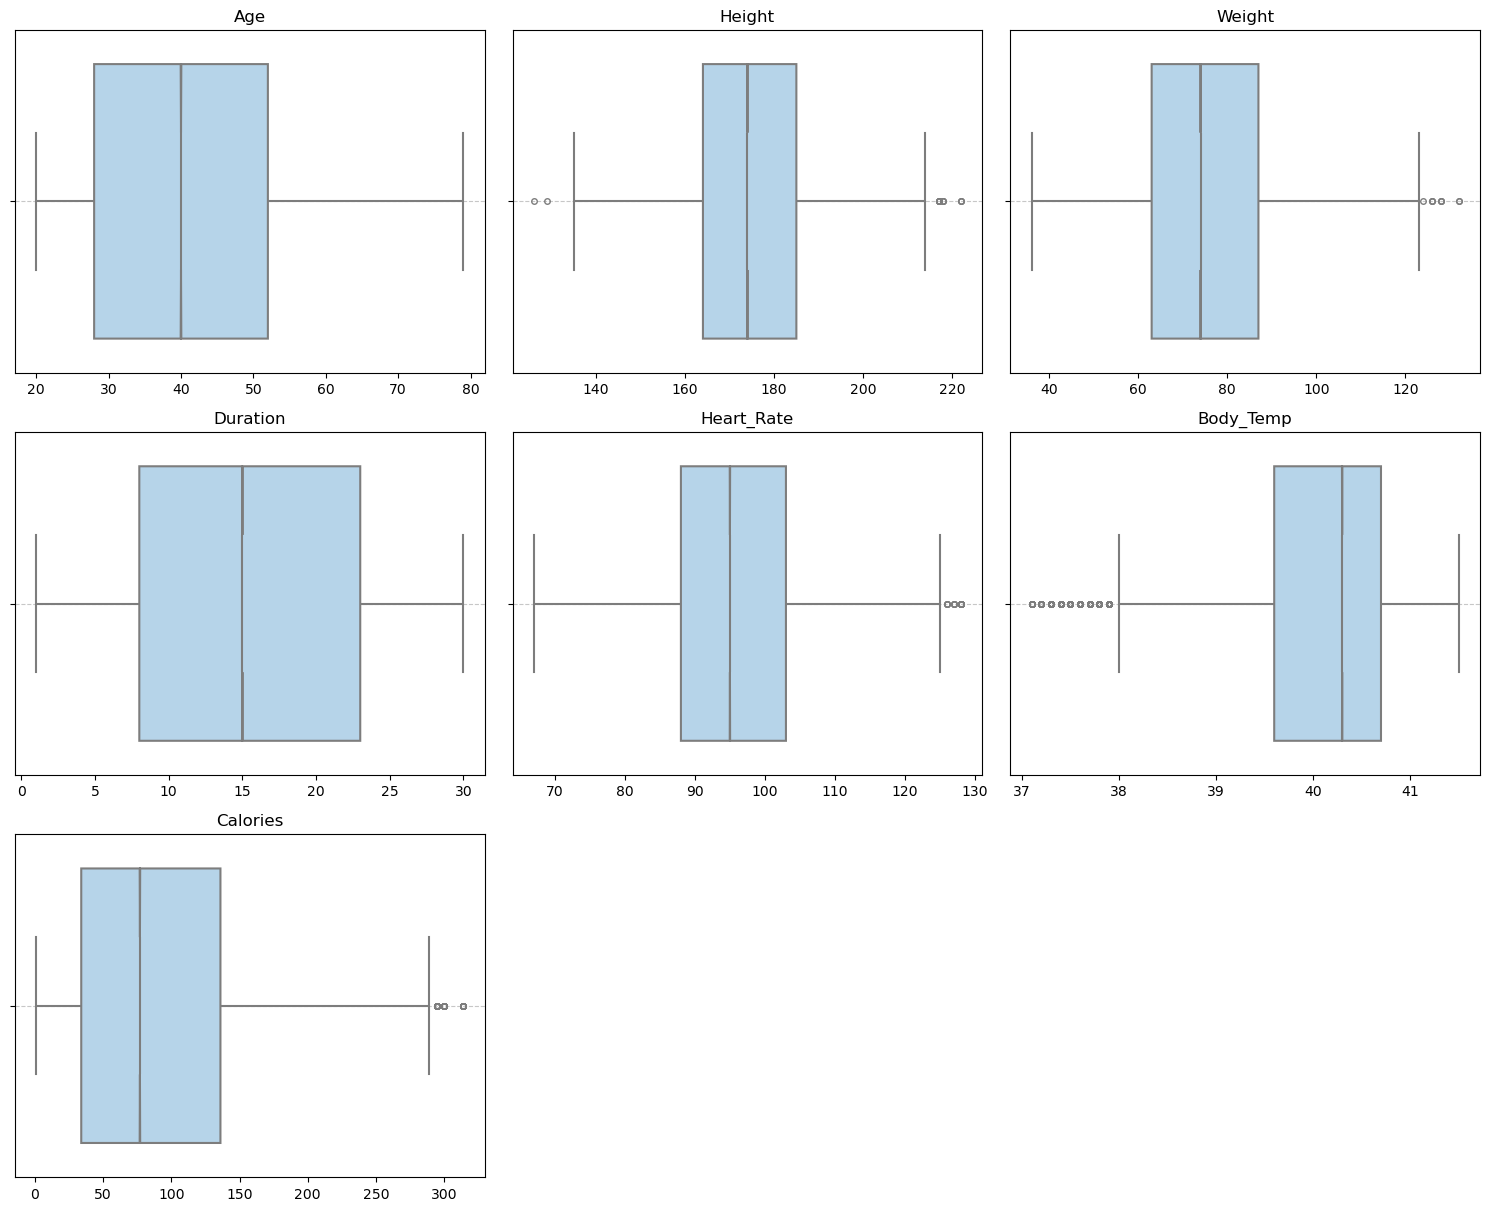

In [9]:
cols_per_row = 3  # Adjust as needed

plt.figure(figsize=(cols_per_row * 5, rows * 4))  # Dynamic figure size

# Loop through columns
for i, col in enumerate(numeric_features, 1):
    plt.subplot(rows, cols_per_row, i)
    
    # Boxplot
    sns.boxplot(
        data=df, 
        x=col,
        color="#AED6F1",         # softer color
        linewidth=1.5,           # thicker lines
        fliersize=4,             # smaller outlier points
        notch=True               # notch to show confidence interval
    )
    
    # Add title and rotate x-labels if needed
    plt.title(col, fontsize=12)
    plt.xlabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # subtle horizontal grid lines

plt.tight_layout()
plt.show()

#### Barplot of Categorical Columns

Value counts for 'Sex':
Sex
female    375721
male      374279
Name: count, dtype: int64

----------------------------------------



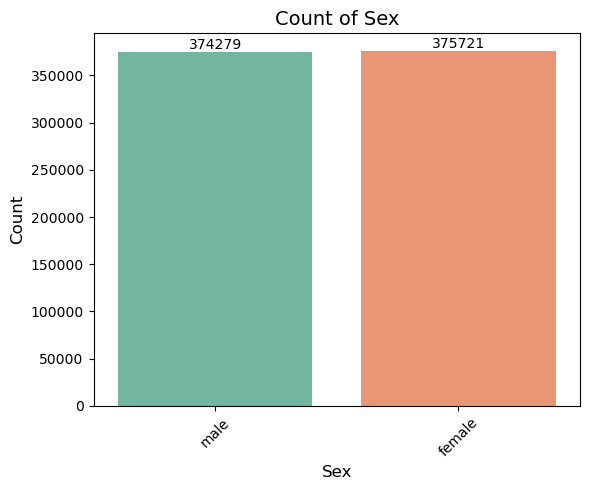

In [10]:
# Value counts
for col in categorical_features:
    print(f"Value counts for '{col}':")
    print(df[col].value_counts())
    print("\n" + "-"*40 + "\n")

# Bar plot
num_cols = len(categorical_features)
plt.figure(figsize=(6*num_cols, 5))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(1, num_cols, i)
    
    sns.countplot(x=col, data=df, hue=col, legend=False, palette="Set2")
    
    # Add counts on top of bars
    for p in plt.gca().patches:
        plt.gca().annotate(f'{int(p.get_height())}', 
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='bottom', fontsize=10)
    
    plt.title(f"Count of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Correlation Matrix

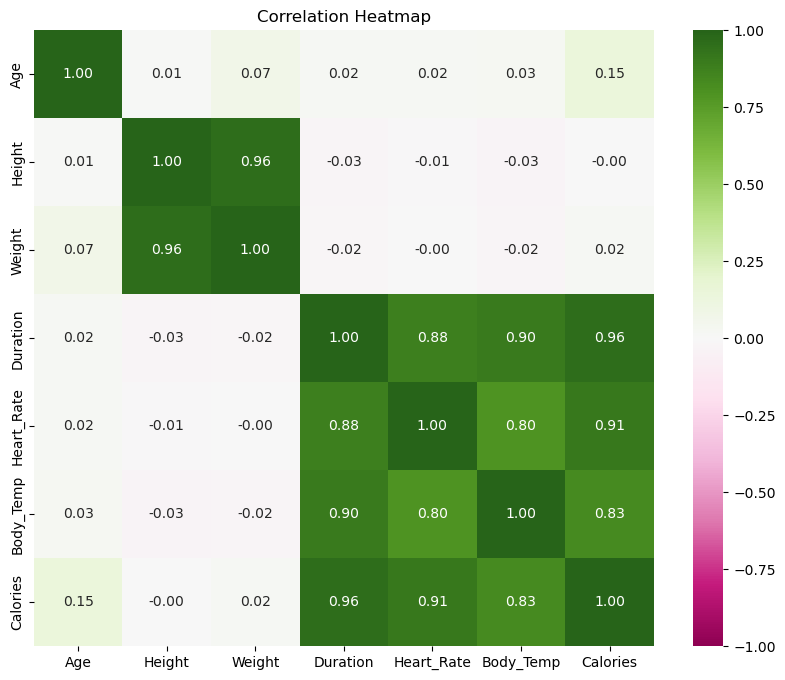

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='PiYG', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

**Conclusion From Correlation Matrix:**

*The heatmap indicates strong positive relationships among exercise-related variables (duration, heart rate, body temperature, and calories), while physical attributes (age, height, weight) show weak or no correlations. Calories burned is mainly influenced by activity intensity and duration rather than physical characteristics.*

## Feature Enginnering

In [12]:
## count of outliers
print("Count of Outliers in each Columns:")
print("------------------------------")
# Dictionary to store outlier counts
outlier_counts = {}

# Loop through each numeric column
for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_counts[col] = len(outliers)

# Print results
for col, count in outlier_counts.items():
    print(f"Number of outliers in '{col}': {count}")

Count of Outliers in each Columns:
------------------------------
Number of outliers in 'Age': 0
Number of outliers in 'Height': 14
Number of outliers in 'Weight': 9
Number of outliers in 'Duration': 0
Number of outliers in 'Heart_Rate': 36
Number of outliers in 'Body_Temp': 14919
Number of outliers in 'Calories': 139


Conclusion on Outlier Handling

Initial statistical checks flagged potential outliers in several numerical features. However, further analysis using summary statistics and domain knowledge confirmed that these values are physiologically valid for individuals performing physical activity. The observed extremes reflect natural variation rather than data errors or anomalies.

Therefore, no outlier removal or capping was applied, as doing so could discard meaningful information and introduce bias. Instead, robust preprocessing techniques, such as robust scaling, are employed, as they naturally handle the influence of extreme but valid values.

This approach preserves data integrity while ensuring stable and reliable model performance, in line with real-world machine learning best practices.

#### New Features: BMI and BMI Category

In [13]:
# Import feature engineering functions
from feature_engineering import calculate_bmi, bmi_category, engineer_features

# Calculate BMI for the dataset
df['BMI'] = calculate_bmi(df['Weight'], df['Height'])
df['BMI_Category'] = df['BMI'].apply(bmi_category)

# Or apply full feature engineering
df = engineer_features(df)


In [14]:
df

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,BMI_Category
0,male,36,189.0,82.0,26.0,101.0,41.0,150.0,22.96,Normal weight
1,female,64,163.0,60.0,8.0,85.0,39.7,34.0,22.58,Normal weight
2,female,51,161.0,64.0,7.0,84.0,39.8,29.0,24.69,Normal weight
3,male,20,192.0,90.0,25.0,105.0,40.7,140.0,24.41,Normal weight
4,female,38,166.0,61.0,25.0,102.0,40.6,146.0,22.14,Normal weight
...,...,...,...,...,...,...,...,...,...,...
749995,male,28,193.0,97.0,30.0,114.0,40.9,230.0,26.04,Overweight
749996,female,64,165.0,63.0,18.0,92.0,40.5,96.0,23.14,Normal weight
749997,male,60,162.0,67.0,29.0,113.0,40.9,221.0,25.53,Overweight
749998,male,45,182.0,91.0,17.0,102.0,40.3,109.0,27.47,Overweight


In [16]:
df.to_csv("../data/processed_data.csv", index = False)